<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
df_train = pd.read_csv('./train.csv')

In [5]:
df_test = pd.read_csv('./test.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
df_train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4840,61,64.05,3902.6,Male,1,Yes,No,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),0
1478,67,101.40,6841.05,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
3658,2,19.95,38.15,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
5021,43,50.20,2169.4,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,0
927,70,109.50,7674.55,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,1


In [8]:
df_test.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
962,21,65.35,1424.4,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic)
526,6,30.50,208.7,Male,0,No,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
499,26,35.40,978.6,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Credit card (automatic)
303,9,94.75,889.9,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
241,59,65.50,3801.3,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
df_train['TotalSpent'] = pd.to_numeric(df_train['TotalSpent'], errors='coerce')

In [11]:
median = df_train['TotalSpent'].median()

In [12]:
df_train['TotalSpent'] = df_train['TotalSpent'].fillna(median)

In [13]:
pd.DataFrame(columns=['Number_of_passes'], index=df_train.columns, data=df_train.isna().sum())

,Number_of_passes
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [14]:
df_test['TotalSpent'] = pd.to_numeric(df_test['TotalSpent'], errors='coerce')

In [15]:
df_test['TotalSpent'] = df_test['TotalSpent'].fillna(df_test['TotalSpent'].median())

In [16]:
pd.DataFrame(columns=['Number_of_passes'], index=df_test.columns, data=df_test.isna().sum())

,Number_of_passes
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [17]:
train_1 = df_train[df_train['Churn'] == 1]
train_0 = df_train[df_train['Churn'] == 0]

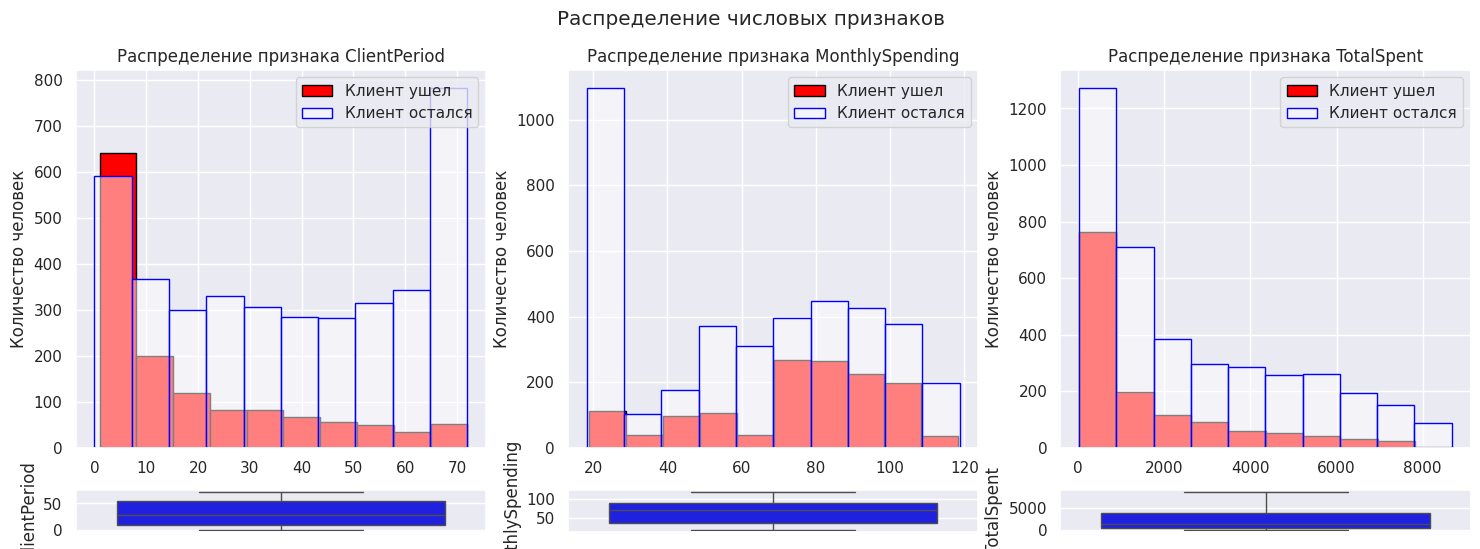

In [18]:
fig,(ax_hist, ax_box) = plt.subplots(nrows=2,
                                     ncols=3,
                                     figsize=(18,6),
                                     sharex=False,
                                     gridspec_kw={"height_ratios": (.9, .1)})
fig.suptitle('Распределение числовых признаков')

for i, num_col in enumerate(num_cols):

    sns.histplot(train_1[num_col],
                bins=10,
                alpha=1,
                label='Клиент ушел',
                color='red',
                edgecolor='black',
                ax=(ax_hist, ax_box)[0][i])

    sns.histplot(train_0[num_col],
                bins=10,
                alpha=0.5,
                label='Клиент остался',
                color='white',
                edgecolor='blue',
                ax=(ax_hist, ax_box)[0][i])

    sns.boxplot(df_train[num_col], color='blue', ax=(ax_hist, ax_box)[1][i])

    ax_hist[i].set(xlabel='',
                    ylabel='Количество человек',
                    title=f'Распределение признака {num_col}')

    ax_hist[i].legend(loc='upper right')

plt.show()

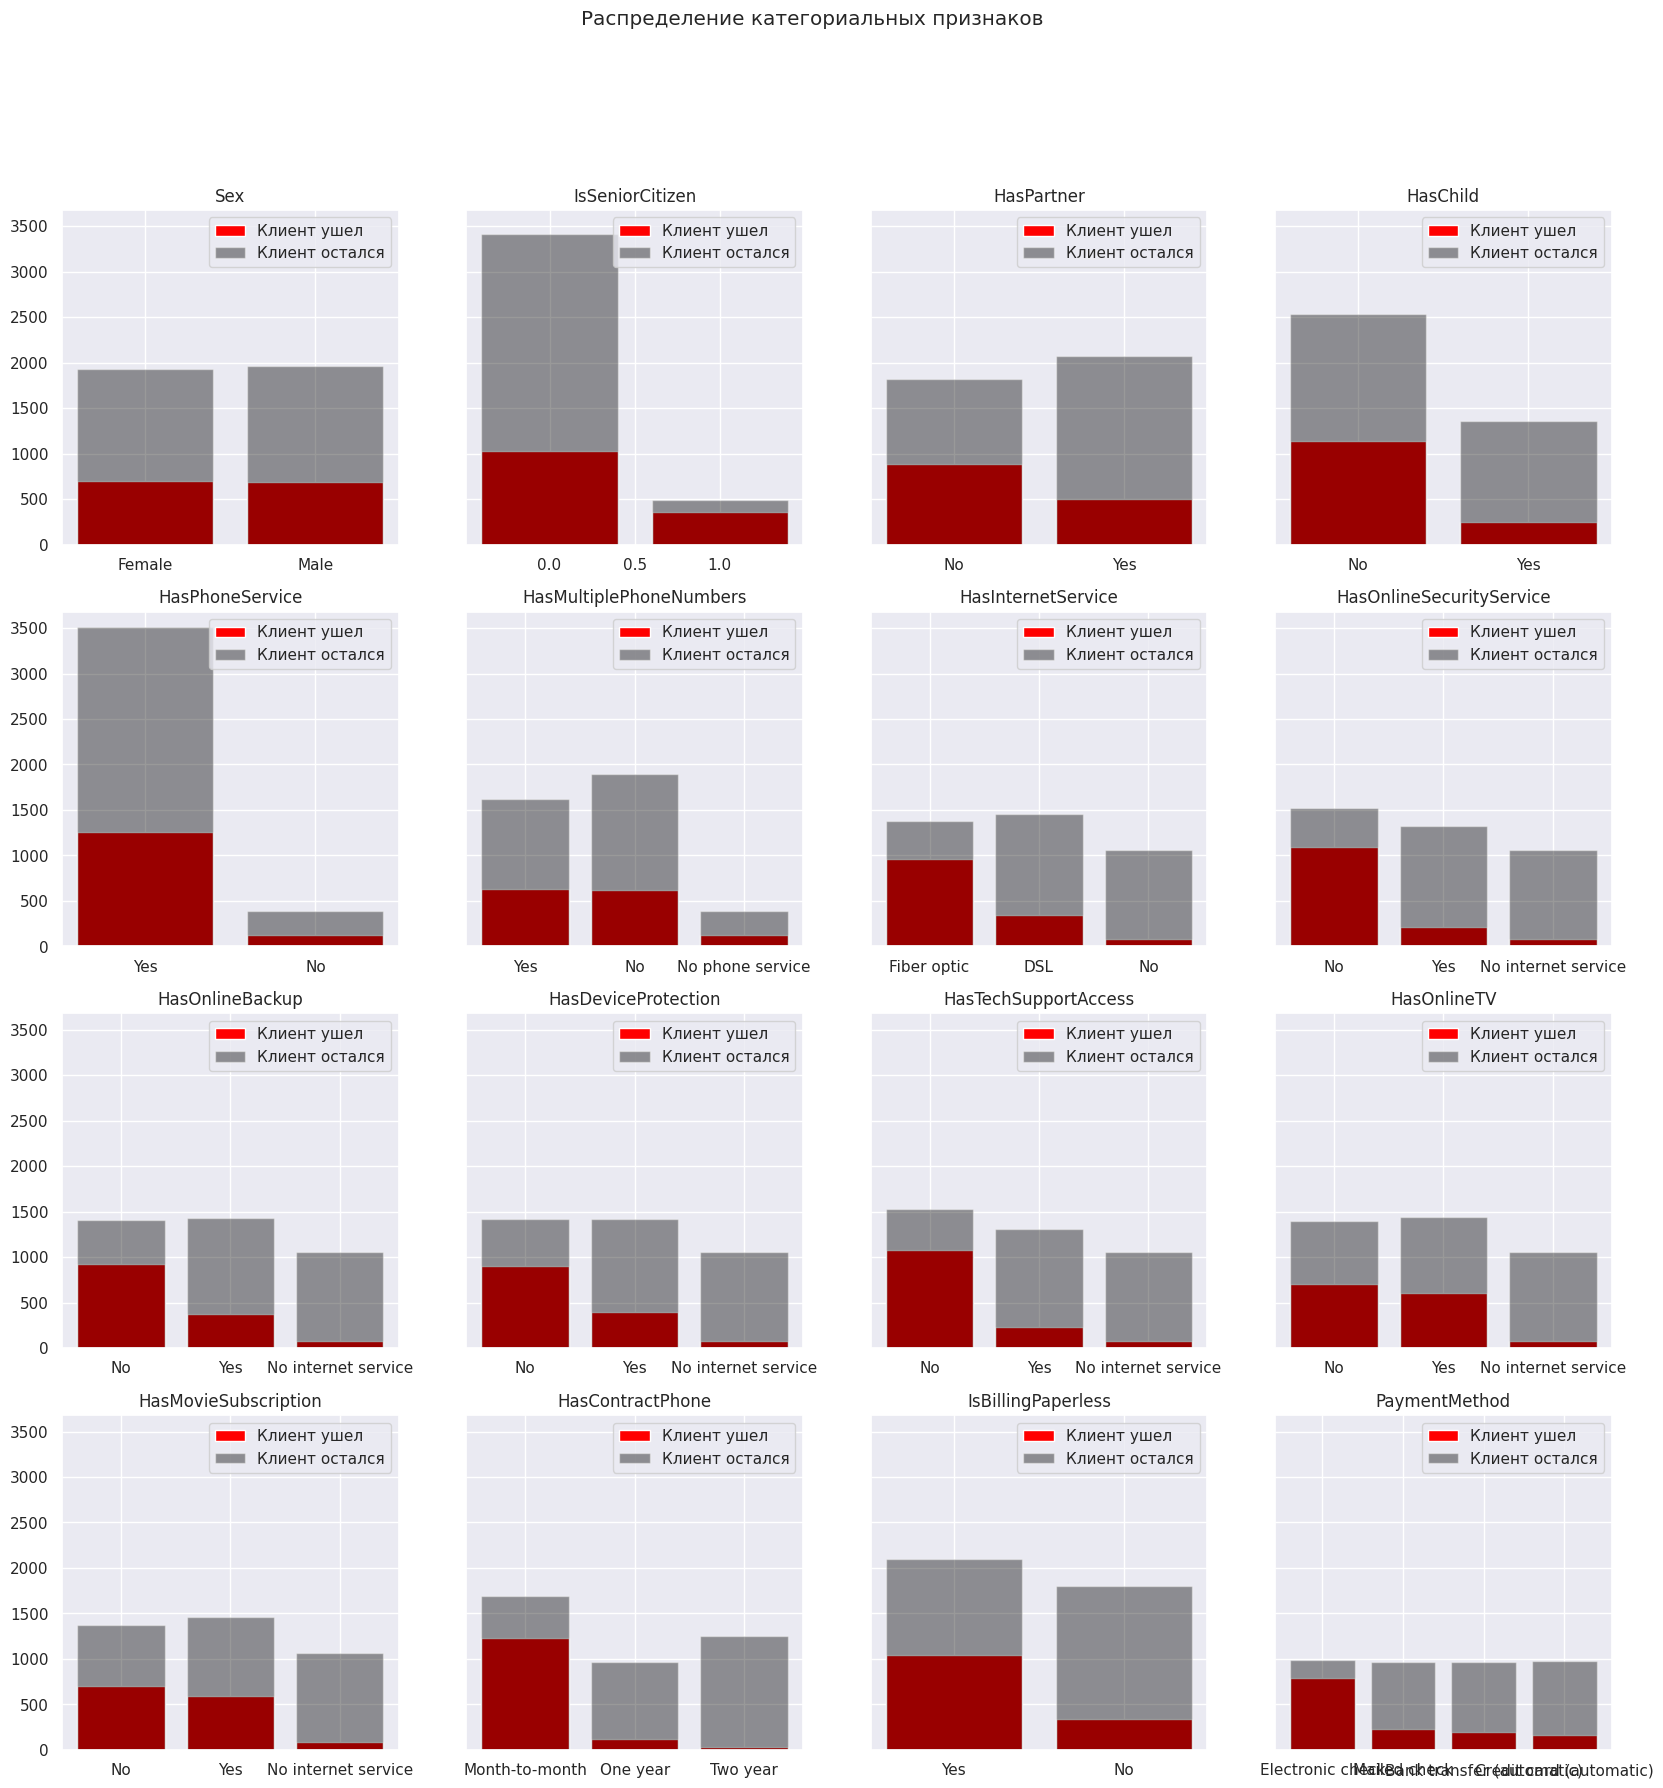

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)
ax = axes.ravel()
fig.suptitle('Распределение категориальных признаков')

for i, cat_col in enumerate(cat_cols):

    val1 = train_1[cat_col].value_counts()
    val0 = train_0[cat_col].value_counts()

    bars1 = ax[i].bar(height=val1,
                        x=val1.index,
                        color='red',
                        label='Клиент ушел')

    bars0 = ax[i].bar(height=val0,
                        x=val0.index,
                        color='black',
                        alpha=0.4,
                        label='Клиент остался')

    ax[i].set_title(cat_col)
    ax[i].legend(loc='upper right')

plt.show()

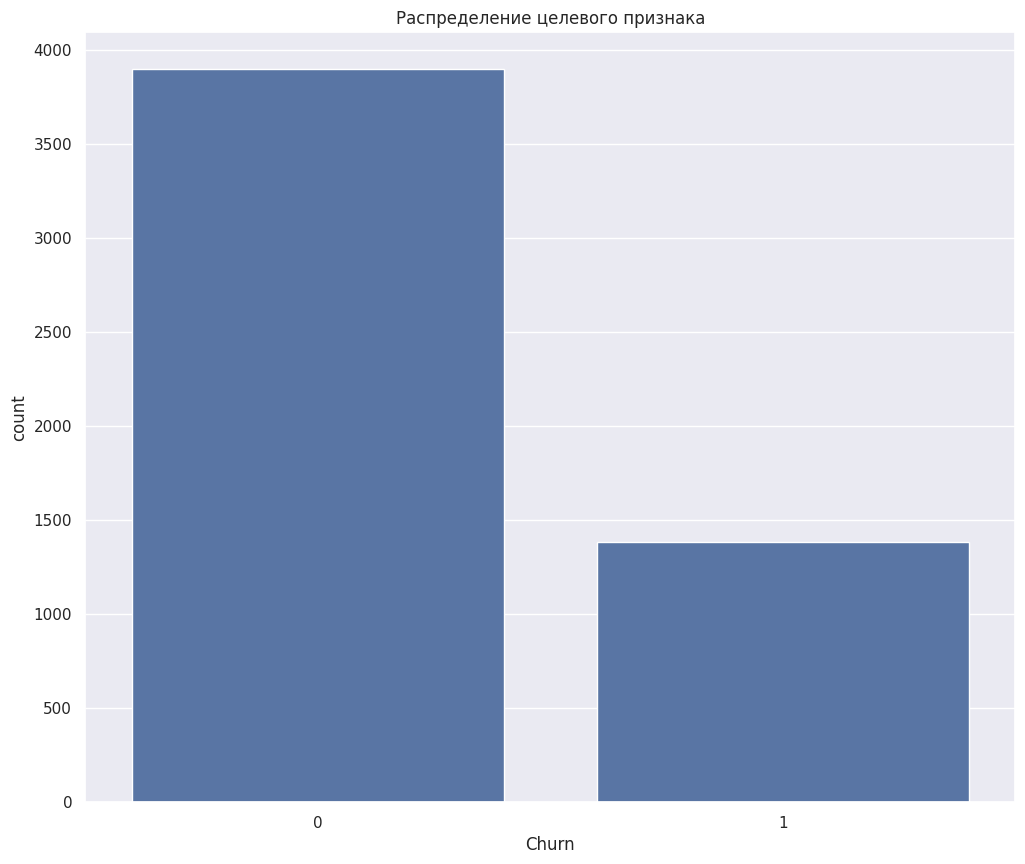

In [20]:
plt.figure(figsize=(12, 10))

ax = sns.countplot(x=df_train['Churn'],
                   order=df_train['Churn'].value_counts().index)

plt.title('Распределение целевого признака')
plt.show()

**Классы являются несбалансированными**

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

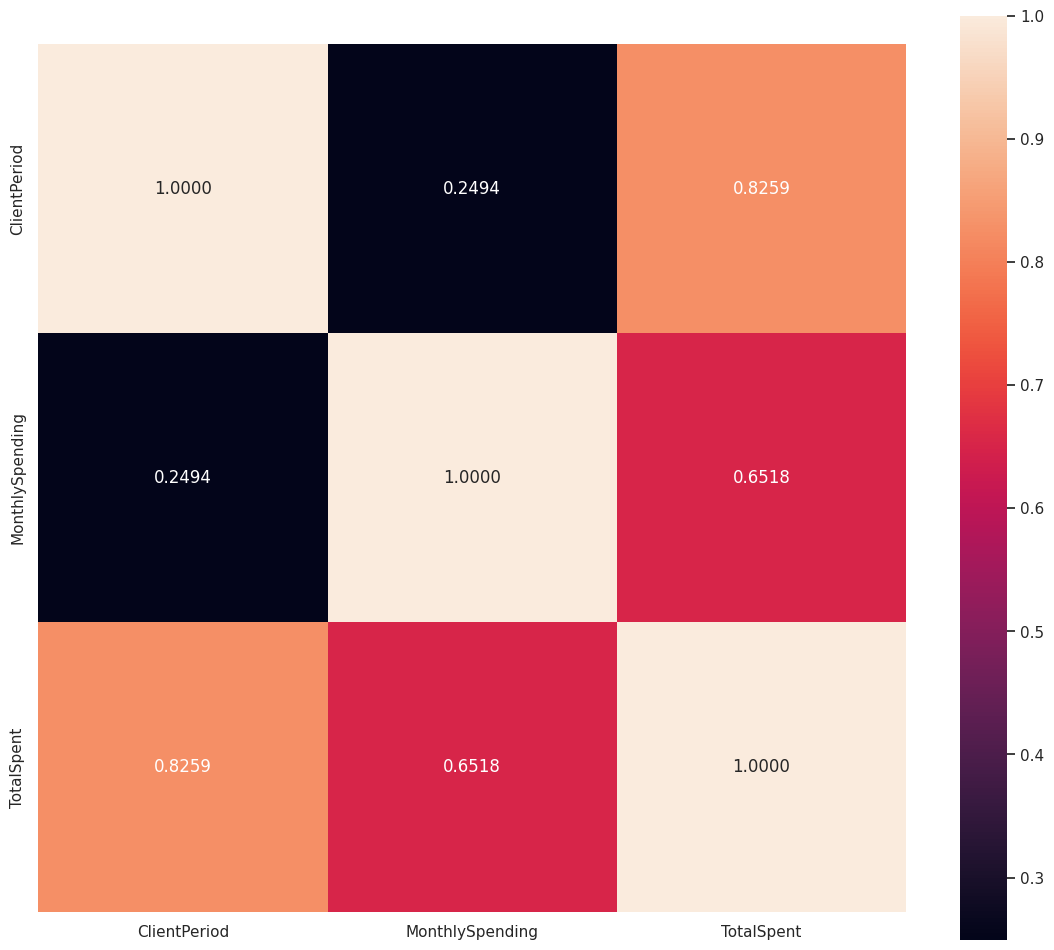

In [21]:
plt.subplots(figsize=(14, 12))
sns.heatmap(df_train[num_cols].corr(),fmt='.4f', square = True, annot=True)
plt.show()

1)Корреляция между TotalSpent и ClientPeriod
2)Корреляция между TotalSpent и MonthlySpending

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
X_train, y_train = df_train.drop(['Churn'], axis=1), df_train['Churn']

In [24]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False
)
alg = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42, solver="saga", max_iter=10000)
)

param_grid = {
    'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', None],
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__class_weight': ['balanced', None]
}

model = GridSearchCV(alg, param_grid, cv=5, verbose=0, scoring='roc_auc', refit=True, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPart...
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', None]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [25]:
print("Best ROC-AUC metric:", round(model.best_score_, 4))
print("Best estimator's parameters:", model.best_params_)

Best ROC-AUC metric: 0.845
Best estimator's parameters: {'logisticregression__C': 10, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l1'}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.1 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostClassifier, Pool, cv

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train, eval_set=(X_valid, y_valid),cat_features=cat_cols, verbose=False)

In [30]:
roc_auc_score(y_valid, cb.predict_proba(X_valid)[:, 1])

0.8314177925951922

In [31]:
cb_model = CatBoostClassifier(
        loss_function='Logloss',
        cat_features=cat_cols,
        random_seed = 42,
        eval_metric='AUC',
        verbose=False
)

In [32]:
param_grid = {
    'l2_leaf_reg': np.linspace(4, 5, 7),
    'max_depth': [3, 5, 7],
    'n_estimators': [200, 300, 400],
    'learning_rate': np.linspace(0.01, 0.2, 10)
}

In [33]:
cb_model.grid_search(
    param_grid,
    X_train,
    y_train,
    cv=5,
    refit=True,
    verbose=False
)


bestTest = 0.8326647688
bestIteration = 196

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8386818496
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8409822866
bestIteration = 181

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8422007994
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8421360996
bestIteration = 148

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8426321314
bestIteration = 98

Metric AUC is not calculated on train by default. To ca

{'params': {'depth': 3,
  'learning_rate': 0.1788888888888889,
  'l2_leaf_reg': 4.5,
  'iterations': 200},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
 

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [34]:
print("Best:", cb_model.get_params())

Best: {'loss_function': 'Logloss', 'random_seed': 42, 'verbose': False, 'eval_metric': 'AUC', 'cat_features': ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'], 'depth': 3, 'learning_rate': 0.1788888888888889, 'l2_leaf_reg': 4.5, 'iterations': 200}


In [35]:
best_cb_model = CatBoostClassifier(
    depth=3,
    iterations=200,
    eval_metric='AUC',
    l2_leaf_reg=4.5,
    learning_rate=0.12,
    loss_function='Logloss',
    cat_features=cat_cols,
    random_seed=42,
    verbose=False
)

In [36]:
best_cb_model.fit(X_train, y_train)

In [37]:
print("Best ROC-AUC metric:", round(roc_auc_score(y_train, best_cb_model.predict_proba(X_train)[:,1]), 4))

Best ROC-AUC metric: 0.8708


# Предсказания

In [41]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_cb_model.predict_proba(df_test)[:,1]
submission.to_csv('my_submission.csv')

In [42]:
submission.head(5)

,Id,Churn
0,0,0.035686
1,1,0.728500
2,2,0.701136
3,3,0.019133
4,4,0.003465


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик.
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.